In [27]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib                 # pip install cdlib #
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality             # pip install pquality #
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1

# Codici utili per tutti gli algortimi 

In [37]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [38]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

In [39]:
#Da utilizzare per i confronti
def scatter_plot(sizes, title):
    fig = plt.figure(figsize=(16,8), dpi= 150)
    ax = fig.add_subplot(111)

   
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha=0.5)
        labels.append(i[2])
    
    
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Size", fontsize=fontsize)
    plt.ylabel("Internal Edge Density", fontsize=fontsize)
    plt.title(title + " Scatter Plot", fontsize=fontsize)
    plt.legend(labels,fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    plt.yscale("linear")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

Importazione dati

In [31]:
community_path = "../content/Dati/"

In [32]:
path = '../content/Real_Network.graphml'

In [40]:
G = nx.read_graphml('Real_Network.graphml')

## 6 - Prova Kcliques¶

In [6]:
import random
k = 7500
sampled_nodes = random.sample(G.nodes, k)
sampled_graph = G.subgraph(sampled_nodes)
k_num = ensemble.Parameter(name="k", start=2, end=8, step=1)

k_coms, scoring = ensemble.random_search(graph=sampled_graph, method=algorithms.kclique,
                                                       parameters=[k_num],
                                                       quality_score=evaluation.newman_girvan_modularity,
                                                       instances=3, aggregate=max)

In [7]:
with open('k.pickle', 'wb') as f:
    pickle.dump(k_coms, f)

In [8]:
with open('k.pickle', 'rb') as f:
    k_coms = pickle.load(f)

In [9]:
print(print_bold_str("Average Internal Degree:"), k_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), k_coms.internal_edge_density())
print(print_bold_str("Conductance:"), k_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), k_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), k_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), k_coms.modularity_density())
print(print_bold_str("Z Modularity:"), k_coms.z_modularity())

Average Internal Degree: FitnessResult(min=5.0, max=18.26135569531796, score=6.024254580459298, std=1.62775426906605)
Internal Edge Density: FitnessResult(min=0.012770178807914657, max=1.0, score=0.9881007442294134, std=0.07045266599632558)
Conductance: FitnessResult(min=0.33904949793863975, max=0.9967248908296943, score=0.9873304659828356, std=0.041387115216031854)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.6699186622093757, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.11259240812065707, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=-403678.70904209476, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=nan, std=None)


In [10]:
print(print_bold_str("N_Community:"), len(k_coms.communities))

max_com_len = 0
for com in k_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)  

N_Community: 411
Max_Dim_Community: 1431


In [11]:
k_tuple = [tuple(x) for x in k_coms.communities]

{'1431': 1, '33': 1, '24': 1, '17': 1, '16': 2, '13': 4, '12': 4, '11': 9, '10': 19, '9': 15, '8': 40, '7': 95, '6': 219}


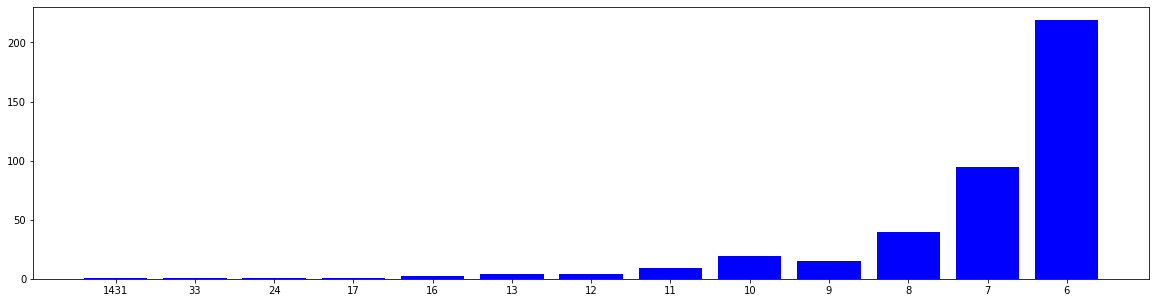

In [12]:
plot_communities_dimentions(k_tuple)

In [15]:
covg_overlap(sampled_graph, k_coms, "K-Cliques")

K-Cliques coverage: 0.39053333333333334
K-Cliques overlap: True
K-Cliques avg degree: FitnessResult(min=5.0, max=18.26135569531796, score=6.024254580459298, std=1.62775426906605)
*******
